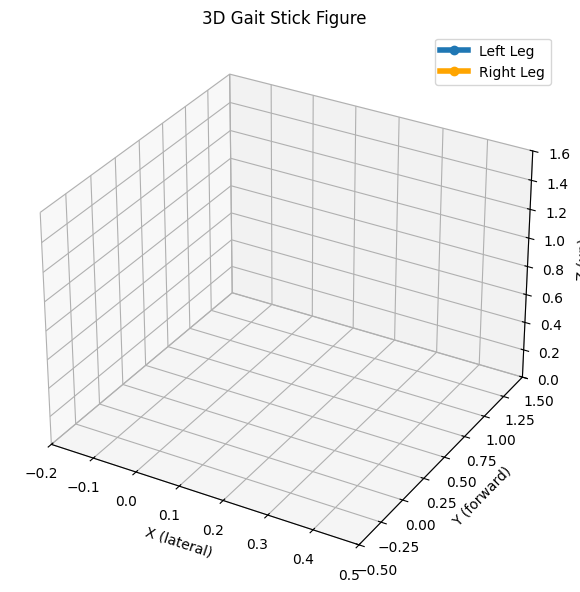

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ----------------------------------------
# Load CSV
# ----------------------------------------
df = pd.read_csv("labeled_gait_output.csv")

# Use a subset to keep animation fast
df = df.iloc[::5].reset_index(drop=True)

# ----------------------------------------
# Segment Lengths (in meters)
# ----------------------------------------
thigh_length = 0.4
shank_length = 0.45

# ----------------------------------------
# 3D Joint Position Calculator
# ----------------------------------------
def compute_leg_positions(hip, thigh_angle, ankle_angle):
    # All movement in YZ plane, X is fixed
    knee = hip + np.array([0, np.cos(thigh_angle), -np.sin(thigh_angle)]) * thigh_length
    ankle = knee + np.array([0, np.cos(ankle_angle), -np.sin(ankle_angle)]) * shank_length
    return knee, ankle

# ----------------------------------------
# Setup Plot
# ----------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.2, 0.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(0, 1.6)
ax.set_xlabel('X (lateral)')
ax.set_ylabel('Y (forward)')
ax.set_zlabel('Z (up)')
ax.set_title("3D Gait Stick Figure")

# Plot elements
left_leg_line, = ax.plot([], [], [], 'o-', lw=4, label="Left Leg")
right_leg_line, = ax.plot([], [], [], 'o-', lw=4, label="Right Leg", color='orange')
time_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes)

# ----------------------------------------
# Animation Update Function
# ----------------------------------------
def update(frame):
    t = df.loc[frame, "Time"] / 1000.0
    L_angle = np.radians(df.loc[frame, "Left_Ankle_Angle"])
    R_angle = np.radians(df.loc[frame, "Right_Ankle_Angle"])

    # Fix hips
    hip_L = np.array([0, 0, 1])
    hip_R = np.array([0.2, 0, 1])

    # Joint positions
    knee_L, ankle_L = compute_leg_positions(hip_L, 0, L_angle)
    knee_R, ankle_R = compute_leg_positions(hip_R, 0, R_angle)

    # Plot Left Leg
    left_leg_line.set_data([hip_L[0], knee_L[0], ankle_L[0]],
                           [hip_L[1], knee_L[1], ankle_L[1]])
    left_leg_line.set_3d_properties([hip_L[2], knee_L[2], ankle_L[2]])

    # Plot Right Leg
    right_leg_line.set_data([hip_R[0], knee_R[0], ankle_R[0]],
                            [hip_R[1], knee_R[1], ankle_R[1]])
    right_leg_line.set_3d_properties([hip_R[2], knee_R[2], ankle_R[2]])

    # Update time
    time_text.set_text(f"Time: {t:.2f}s")

    return left_leg_line, right_leg_line, time_text

# ----------------------------------------
# Run Animation
# ----------------------------------------
ani = FuncAnimation(fig, update, frames=len(df), interval=40, blit=False)
plt.legend()
plt.tight_layout()
plt.show()
